## GeoNet locations 1980 - 2022 most of Lake Taupo

18,000+ events

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

import datetime as dt
import numpy as np

In [2]:
# url = 'https://quakesearch.geonet.org.nz/csv?bbox=175.6159,-39.0601,176.2270,-38.5121&maxdepth=30&startdate=1980-01-01T0:00:00&enddate=2022-06-10T2:00:00'

# df = pd.read_csv(url)

# df.to_csv('geonet_quakesearch_1980-2022.csv', index=False)

In [3]:
#read previously acquired data file
eqs = pd.read_csv('geonet_quakesearch_1980-2022.csv', parse_dates=['origintime'], usecols=[0,2,4,5,6,7,9,10,11,12,13], index_col='origintime')

#sort so earliest at top
eqs.sort_index(inplace=True)

In [4]:
eqs.head()

,publicid,longitude,latitude,magnitude,depth,depthtype,evaluationmethod,evaluationstatus,evaluationmode,earthmodel
origintime,,,,,,,,,,
1980-02-16 13:56:15.730000+00:00,1560729,175.94000,-38.84,3.310,12.0,operator assigned,LOCAL,reviewed,manual,nz1d
1980-02-16 14:24:44.400000+00:00,1560731,175.92999,-38.78,3.683,12.0,operator assigned,LOCAL,reviewed,manual,nz1d
1980-05-02 23:04:33.250000+00:00,1560897,176.06000,-38.78,2.767,1.0,operator assigned,LOCAL,reviewed,manual,nz1d
1980-07-19 04:05:31.700000+00:00,1561078,176.07001,-38.52,2.700,12.0,operator assigned,LOCAL,reviewed,manual,nz1d
1980-10-03 11:33:21.800000+00:00,1561250,176.21001,-38.68,2.767,0.0,operator assigned,LOCAL,reviewed,manual,nz1d


In [5]:
geonet = dt.datetime(2001, 3, 1)
ngmc = dt.datetime(2018, 12, 12)

local = dt.datetime(1980, 1, 1)
cusp = dt.datetime(1987, 1, 1)
sc3 = dt.datetime(2012, 1, 1)
end = dt.datetime(2022, 6, 10)

#### evaluationmethod

evaluationmethod = The computer technique used to locate the earthquake

In [6]:
eqs['evaluationmethod'].value_counts()

GROPE                                                           10500
NonLinLoc                                                        4728
LOCSAT                                                           3096
LOCAL                                                             271
felt solution determined from a small number of felt reports       55
Name: evaluationmethod, dtype: int64

In [7]:
#replace 'felt solution determined from a small number of felt reports' by 'felt reports' as this is much smaller
eqs.replace({'felt solution determined from a small number of felt reports': 'felt reports'}, inplace=True)

In [8]:
#get list of evalautionmethods, y-axis values for those, then map to a dataframe column
methodlist = list(eqs['evaluationmethod'].unique())
yvals = range((len(methodlist)))
methvals = dict(zip(methodlist, yvals))
#add column to dataframe based on dictionary key:value pairs
eqs['methody'] = eqs['evaluationmethod'].map(methvals)

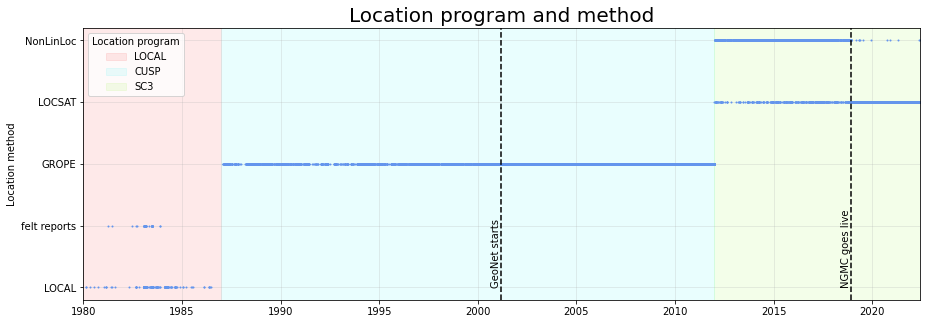

In [9]:
fig,ax = plt.subplots(1,1, figsize=(15,5))

#shade respective analysis systems
ax.axvspan(local, cusp, alpha=0.1, color='#f72e2e', label='LOCAL')
ax.axvspan(cusp, sc3, alpha=0.1, color='#2ef7f7', label='CUSP')
ax.axvspan(sc3, end, alpha=0.1, color='#92f72e', label='SC3')

ax.plot(eqs['methody'], marker='o', markersize=1, linestyle='None', color='cornflowerblue')
    
#add locations as y-axis labels
ax.set_yticks(list(range(len(methodlist))))
ax.set_yticklabels(methodlist)
ax.set_ylabel('Location method')

ax.grid(alpha=0.3)

ax.axvline(x=geonet, color='black', linestyle='--')
ax.text(geonet, 0, 'GeoNet starts', color='black', rotation='vertical', verticalalignment='bottom', horizontalalignment='right')
ax.axvline(x=ngmc, color='black', linestyle='--')
ax.text(ngmc, 0, 'NGMC goes live', color='black', rotation='vertical', verticalalignment='bottom', horizontalalignment='right')

ax.set_xlim(left=local, right=end)

plt.legend(loc='upper left', title='Location program')

plt.title('Location program and method', fontsize=20)

fig.savefig('location_method.png', facecolor='white', dpi=200, bbox_inches='tight')

#### evaluationstatus

evaluationstatus = The status of the location: preliminary, reviewed, etc

In [10]:
#replace NaN by 'not specified' as this is much more understandable
eqs['evaluationstatus'] = eqs['evaluationstatus'].fillna('not specified')

In [11]:
eqs['evaluationstatus'].value_counts()

reviewed         10826
confirmed         5549
not specified     2255
preliminary         20
Name: evaluationstatus, dtype: int64

In [12]:
#get list of evalautionstatuss, y-axis values for those, then map to a dataframe column
statuslist = list(eqs['evaluationstatus'].unique())
yvals = range((len(statuslist)))
statvals = dict(zip(statuslist, yvals))
#add column to dataframe based on dictionary key:value pairs
eqs['statusy'] = eqs['evaluationstatus'].map(statvals)

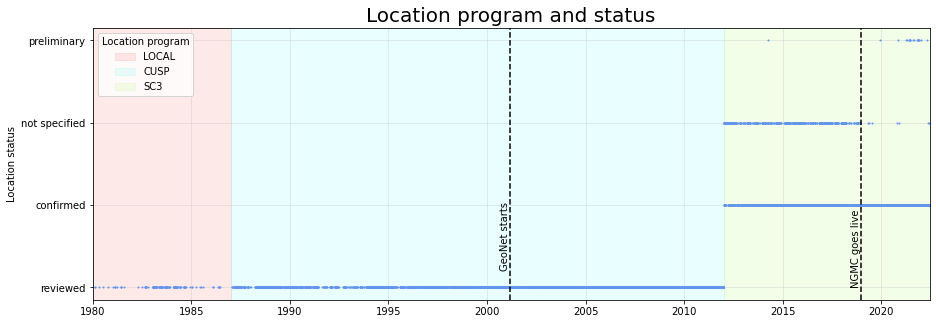

In [13]:
fig,ax = plt.subplots(1,1, figsize=(15,5))

#shade respective analysis systems
ax.axvspan(local, cusp, alpha=0.1, color='#f72e2e', label='LOCAL')
ax.axvspan(cusp, sc3, alpha=0.1, color='#2ef7f7', label='CUSP')
ax.axvspan(sc3, end, alpha=0.1, color='#92f72e', label='SC3')

ax.plot(eqs['statusy'], marker='o', markersize=1, linestyle='None', color='cornflowerblue')
    
#add locations as y-axis labels
ax.set_yticks(list(range(len(statuslist))))
ax.set_yticklabels(statuslist)
ax.set_ylabel('Location status')

ax.grid(alpha=0.3)

ax.axvline(x=geonet, color='black', linestyle='--')
ax.text(geonet, 0.2, 'GeoNet starts', color='black', rotation='vertical', verticalalignment='bottom', horizontalalignment='right')
ax.axvline(x=ngmc, color='black', linestyle='--')
ax.text(ngmc, 0, 'NGMC goes live', color='black', rotation='vertical', verticalalignment='bottom', horizontalalignment='right')

ax.set_xlim(left=local, right=end)

plt.legend(loc='upper left', title='Location program')

plt.title('Location program and status', fontsize=20)

fig.savefig('location_status.png', facecolor='white', dpi=200, bbox_inches='tight')

#### evaluationmode

evaluationmode = The mode of location: manual or automatic

In [14]:
eqs['evaluationmode'].value_counts()

manual       16356
automatic     2294
Name: evaluationmode, dtype: int64

In [15]:
#get list of evalautionstatuss, y-axis values for those, then map to a dataframe column
modelist = list(eqs['evaluationmode'].unique())
yvals = range((len(modelist)))
modevals = dict(zip(modelist, yvals))
#add column to dataframe based on dictionary key:value pairs
eqs['modey'] = eqs['evaluationmode'].map(modevals)

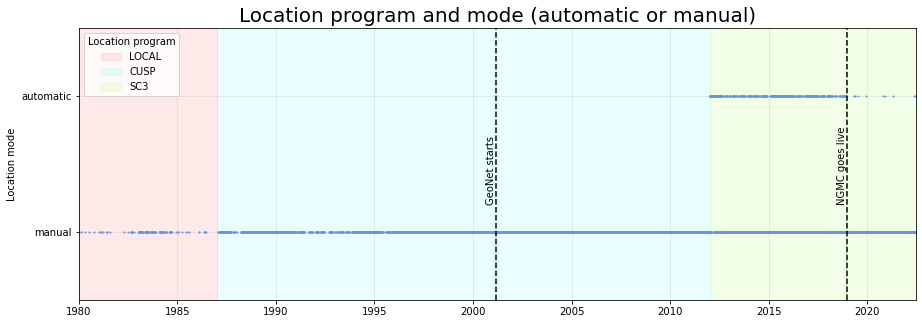

In [16]:
fig,ax = plt.subplots(1,1, figsize=(15,5))

#shade respective analysis systems
ax.axvspan(local, cusp, alpha=0.1, color='#f72e2e', label='LOCAL')
ax.axvspan(cusp, sc3, alpha=0.1, color='#2ef7f7', label='CUSP')
ax.axvspan(sc3, end, alpha=0.1, color='#92f72e', label='SC3')

ax.plot(eqs['modey'], marker='o', markersize=1, linestyle='None', color='cornflowerblue')
    
#add locations as y-axis labels
ax.set_yticks(list(range(len(modelist))))
ax.set_yticklabels(modelist)
ax.set_ylabel('Location mode')

ax.grid(alpha=0.3)

#ylim to make look better with just two categories
ax.set_ylim(bottom=-0.5, top=1.5)

ax.axvline(x=geonet, color='black', linestyle='--')
ax.text(geonet, 0.2, 'GeoNet starts', color='black', rotation='vertical', verticalalignment='bottom', horizontalalignment='right')
ax.axvline(x=ngmc, color='black', linestyle='--')
ax.text(ngmc, 0.2, 'NGMC goes live', color='black', rotation='vertical', verticalalignment='bottom', horizontalalignment='right')

ax.set_xlim(left=local, right=end)

plt.legend(loc='upper left', title='Location program')

plt.title('Location program and mode (automatic or manual)', fontsize=20)

fig.savefig('location_mode.png', facecolor='white', dpi=200, bbox_inches='tight')

#### earthmodel

earthmodel = The earth model used by the evaluationmethod

In [17]:
eqs['earthmodel'].value_counts()

nz1dr       10500
nz3drx       4724
iasp91       3096
nz1d          271
iaspei91        4
Name: earthmodel, dtype: int64

In [18]:
#'iaspei91' is 'iasp91' model used with NonLinLoc, presumably in error. Rename this to 'isap91' as we want to f0cus on
#just the velocity model and not include the location method at all
eqs['earthmodel'].replace({'iaspei91': 'iasp91'}, inplace=True)

#replace NaN by 'felt reports' as events with no velicuty model match (by eye) those that were located by felt reports
eqs['earthmodel'] = eqs['earthmodel'].fillna('felt reports')

In [19]:
#get list of evalautionstatuss, y-axis values for those, then map to a dataframe column
earthlist = list(eqs['earthmodel'].unique())
yvals = range((len(earthlist)))
earthvals = dict(zip(earthlist, yvals))
#add column to dataframe based on dictionary key:value pairs
eqs['earthy'] = eqs['earthmodel'].map(earthvals)

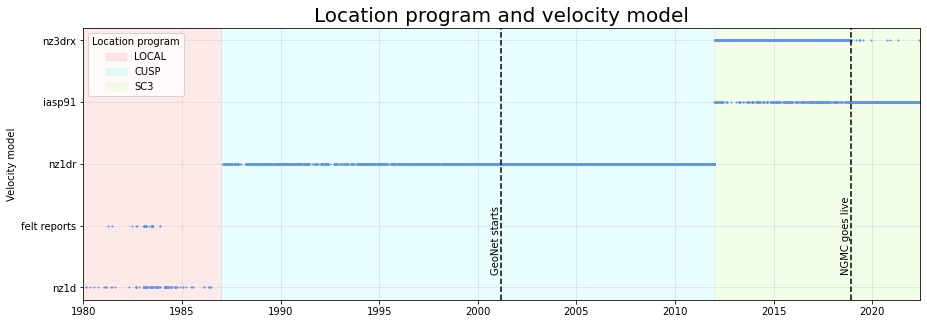

In [20]:
fig,ax = plt.subplots(1,1, figsize=(15,5))

#shade respective analysis systems
ax.axvspan(local, cusp, alpha=0.1, color='#f72e2e', label='LOCAL')
ax.axvspan(cusp, sc3, alpha=0.1, color='#2ef7f7', label='CUSP')
ax.axvspan(sc3, end, alpha=0.1, color='#92f72e', label='SC3')

ax.plot(eqs['earthy'], marker='o', markersize=1, linestyle='None', color='cornflowerblue')
    
#add locations as y-axis labels
ax.set_yticks(list(range(len(earthlist))))
ax.set_yticklabels(earthlist)
ax.set_ylabel('Velocity model')

ax.grid(alpha=0.3)

ax.axvline(x=geonet, color='black', linestyle='--')
ax.text(geonet, 0.2, 'GeoNet starts', color='black', rotation='vertical', verticalalignment='bottom', horizontalalignment='right')
ax.axvline(x=ngmc, color='black', linestyle='--')
ax.text(ngmc, 0.2, 'NGMC goes live', color='black', rotation='vertical', verticalalignment='bottom', horizontalalignment='right')

ax.set_xlim(left=local, right=end)

plt.legend(loc='upper left', title='Location program')

plt.title('Location program and velocity model', fontsize=20)

fig.savefig('velocity_model.png', facecolor='white', dpi=200, bbox_inches='tight')

## Time-series used in blog

In [21]:
list(range(len(earthlist)))

[0, 1, 2, 3, 4]

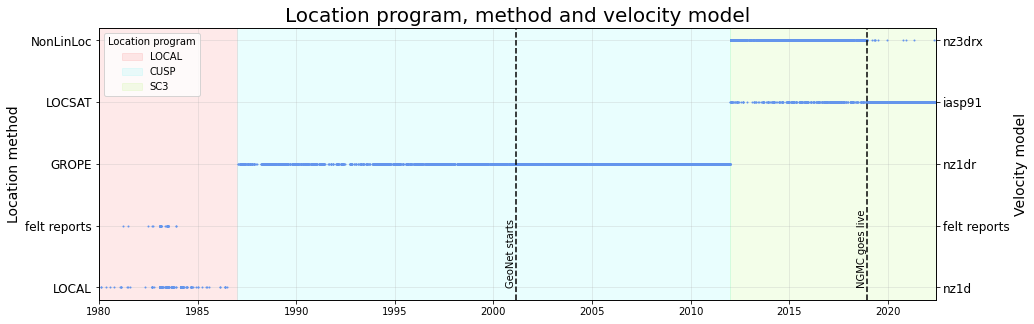

In [22]:
fig,ax = plt.subplots(1,1, figsize=(15,5))

#shade respective analysis systems
ax.axvspan(local, cusp, alpha=0.1, color='#f72e2e', label='LOCAL')
ax.axvspan(cusp, sc3, alpha=0.1, color='#2ef7f7', label='CUSP')
ax.axvspan(sc3, end, alpha=0.1, color='#92f72e', label='SC3')

ax.plot(eqs['methody'], marker='o', markersize=1, linestyle='None', color='cornflowerblue')
    
#add locations as y-axis labels
ax.set_yticks(list(range(len(methodlist))))
ax.set_yticklabels(methodlist, fontsize=12)
ax.set_ylabel('Location method', fontsize=14)
ax.set_ylim(bottom=-0.2, top=4.2)

axr = ax.twinx()
axr.set_yticks(list(range(len(earthlist))))
axr.set_yticklabels(earthlist, fontsize=12)
axr.set_ylabel('Velocity model', fontsize=14)
axr.set_ylim(bottom=-0.2, top=4.2)

ax.grid(alpha=0.3)

ax.axvline(x=geonet, color='black', linestyle='--')
ax.text(geonet, 0, 'GeoNet starts', color='black', rotation='vertical', verticalalignment='bottom', horizontalalignment='right')
ax.axvline(x=ngmc, color='black', linestyle='--')
ax.text(ngmc, 0, 'NGMC goes live', color='black', rotation='vertical', verticalalignment='bottom', horizontalalignment='right')

ax.set_xlim(left=local, right=end)

ax.legend(loc='upper left', title='Location program')

plt.title('Location program, method and velocity model', fontsize=20)

fig.savefig('location_method_model.png', facecolor='white', dpi=200, bbox_inches='tight')